<h1><center>Telecom Churn Case Study</center></h1>

### Business Prespective
For many incumbent operators, retaining high profitable customers is the number one business goal.<br>
To reduce customer churn, telecom companies need to predict which customers are at high risk of churn.

## PART 1 : Importing Libraries and Data Understanding

In [69]:
import operator

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler

from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA

from sklearn.model_selection import train_test_split

# Importing random forest classifier from sklearn library
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

# Importing classification report and confusion matrix from sklearn metrics
from sklearn.metrics import classification_report,confusion_matrix, accuracy_score


# GridSearchCV to find optimal n_estimators
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

from sklearn import metrics

# To ignore warnings
import warnings
warnings.filterwarnings("ignore")

pd.set_option('display.max_columns', 500)
pd.set_option('display.max_rows', 500)

In [2]:
date_parsed = ['date_of_last_rech_6','date_of_last_rech_7','date_of_last_rech_8','date_of_last_rech_9']
df=pd.read_csv('telecom_churn_data.csv',parse_dates=date_parsed)
df.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,last_date_of_month_9,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,date_of_last_rech_6,date_of_last_rech_7,date_of_last_rech_8,date_of_last_rech_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,date_of_last_rech_data_6,date_of_last_rech_data_7,date_of_last_rech_data_8,date_of_last_rech_data_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
0,7000842753,109,0.0,0.0,0.0,6/30/2014,7/31/2014,8/31/2014,9/30/2014,197.385,214.816,213.803,21.100,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,0.00,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,NaN,4.13,NaN,NaN,NaN,1.15,NaN,NaN,NaN,5.44,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.00,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.00,NaN,0.00,0.00,5.44,0.00,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,NaN,NaN,0.0,NaN,4,3,

In [3]:
df.describe()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,arpu_6,arpu_7,arpu_8,arpu_9,onnet_mou_6,onnet_mou_7,onnet_mou_8,onnet_mou_9,offnet_mou_6,offnet_mou_7,offnet_mou_8,offnet_mou_9,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_ic_mou_9,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,roam_og_mou_9,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2t_mou_9,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2m_mou_9,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2f_mou_9,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_t2c_mou_9,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,loc_og_mou_9,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2t_mou_9,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2m_mou_9,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2f_mou_9,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_t2c_mou_9,std_og_mou_6,std_og_mou_7,std_og_mou_8,std_og_mou_9,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,isd_og_mou_9,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,spl_og_mou_9,og_others_6,og_others_7,og_others_8,og_others_9,total_og_mou_6,total_og_mou_7,total_og_mou_8,total_og_mou_9,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2t_mou_9,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2m_mou_9,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_t2f_mou_9,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,loc_ic_mou_9,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2t_mou_9,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2m_mou_9,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2f_mou_9,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_t2o_mou_9,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,std_ic_mou_9,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,total_ic_mou_9,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,spl_ic_mou_9,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,isd_ic_mou_9,ic_others_6,ic_others_7,ic_others_8,ic_others_9,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_num_9,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,total_rech_amt_9,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,max_rech_amt_9,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,last_day_rch_amt_9,total_rech_data_6,total_rech_data_7,total_rech_data_8,total_rech_data_9,max_rech_data_6,max_rech_data_7,max_rech_data_8,max_rech_data_9,count_rech_2g_6,count_rech_2g_7,count_rech_2g_8,count_rech_2g_9,count_rech_3g_6,count_rech_3g_7,count_rech_3g_8,count_rech_3g_9,av_rech_amt_data_6,av_rech_amt_data_7,av_rech_amt_data_8,av_rech_amt_data_9,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_2g_mb_9,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,vol_3g_mb_9,arpu_3g_6,arpu_3g_7,arpu_3g_8,arpu_3g_9,arpu_2g_6,arpu_2g_7,arpu_2g_8,arpu_2g_9,night_pck_user_6,night_pck_user_7,night_pck_user_8,night_pck_user_9,monthly_2g_6,monthly_2g_7,monthly_2g_8,monthly_2g_9,sachet_2g_6,sachet_2g_7,sachet_2g_8,sachet_2g_9,monthly_3g_6,monthly_3g_7,monthly_3g_8,monthly_3g_9,sachet_3g_6,sachet_3g_7,sachet_3g_8,sachet_3g_9,fb_user_6,fb_user_7,fb_user_8,fb_user_9,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g
count,9.999900e+04,99999.0,98981.0,98981.0,98981.0,99999.000000,99999.000000,99999.000000,99999.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.0,96140.0,94621.0,92254.0,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621.000000,92254.000000,96062.000000,96140.000000,94621

In [4]:
list(df.columns)

['mobile_number',
 'circle_id',
 'loc_og_t2o_mou',
 'std_og_t2o_mou',
 'loc_ic_t2o_mou',
 'last_date_of_month_6',
 'last_date_of_month_7',
 'last_date_of_month_8',
 'last_date_of_month_9',
 'arpu_6',
 'arpu_7',
 'arpu_8',
 'arpu_9',
 'onnet_mou_6',
 'onnet_mou_7',
 'onnet_mou_8',
 'onnet_mou_9',
 'offnet_mou_6',
 'offnet_mou_7',
 'offnet_mou_8',
 'offnet_mou_9',
 'roam_ic_mou_6',
 'roam_ic_mou_7',
 'roam_ic_mou_8',
 'roam_ic_mou_9',
 'roam_og_mou_6',
 'roam_og_mou_7',
 'roam_og_mou_8',
 'roam_og_mou_9',
 'loc_og_t2t_mou_6',
 'loc_og_t2t_mou_7',
 'loc_og_t2t_mou_8',
 'loc_og_t2t_mou_9',
 'loc_og_t2m_mou_6',
 'loc_og_t2m_mou_7',
 'loc_og_t2m_mou_8',
 'loc_og_t2m_mou_9',
 'loc_og_t2f_mou_6',
 'loc_og_t2f_mou_7',
 'loc_og_t2f_mou_8',
 'loc_og_t2f_mou_9',
 'loc_og_t2c_mou_6',
 'loc_og_t2c_mou_7',
 'loc_og_t2c_mou_8',
 'loc_og_t2c_mou_9',
 'loc_og_mou_6',
 'loc_og_mou_7',
 'loc_og_mou_8',
 'loc_og_mou_9',
 'std_og_t2t_mou_6',
 'std_og_t2t_mou_7',
 'std_og_t2t_mou_8',
 'std_og_t2t_mou_9',
 's

In [5]:
df.shape

(99999, 226)

There are a lot of rows , and columns. We will analyze in next part

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 99999 entries, 0 to 99998
Columns: 226 entries, mobile_number to sep_vbc_3g
dtypes: datetime64[ns](4), float64(179), int64(35), object(8)
memory usage: 172.4+ MB


## PART 2 : Data Preparation And Analysis

### Considering only High value Churn

In the Indian and the southeast Asian market, approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

As mentioned above, we need to predict churn only for the high-value customers. 
<br> $Define- high-value -customers -as- follows:$ Those who have recharged with an amount more than or equal to X, where X is the `70th percentile` of the average recharge amount in the first two months (the good phase).

'av_rech_amt_data_6','av_rech_amt_data_7'

In [7]:
a = df.filter(regex=(".*rech.*")).head()
a.filter(regex=(".*6.*")).head()

,total_rech_num_6,total_rech_amt_6,max_rech_amt_6,date_of_last_rech_6,date_of_last_rech_data_6,total_rech_data_6,max_rech_data_6,count_rech_2g_6,count_rech_3g_6,av_rech_amt_data_6
0,4,362,252,2014-06-21,6/21/2014,1.0,252.0,0.0,1.0,252.0
1,4,74,44,2014-06-29,NaN,NaN,NaN,NaN,NaN,NaN
2,5,168,86,2014-06-17,NaN,NaN,NaN,NaN,NaN,NaN
3,10,230,60,2014-06-28,NaN,NaN,NaN,NaN,NaN,NaN
4,5,196,56,2014-06-26,6/4/2014,1.0,56.0,1.0,0.0,56.0


In [8]:
df['good_phase_avg_recharge'] = ((df['total_rech_amt_6']/df['total_rech_num_6']) + (df['total_rech_amt_7']/df['total_rech_num_7']))/2
#first_month_avg_recharge_70p = df['av_rech_amt_data_6'].quantile(0.7)
#second_month_avg_recharge_70p = df['av_rech_amt_data_7'].quantile(0.7)

In [9]:
good_phase_avg_recharge = df['good_phase_avg_recharge'].quantile(0.7)

In [10]:
df = df[(df['good_phase_avg_recharge']>= good_phase_avg_recharge)]

In [11]:
len(df)

29044

Let see the columns corresponding to possible churners
### Possible Churn Customers <br>
 There could be 2 types of possible churners here

$Revenue-based churn:$ Customers who have not utilised any revenue-generating facilities such as mobile internet, outgoing calls, SMS etc. over a given period of time. One could also use aggregate metrics such as ‘customers who have generated less than INR 4 per month in total/average/median revenue’.

$Usage-based churn:$ Customers who have not done any usage, either incoming or outgoing - in terms of calls, internet etc. over a period of time.

In this project, we will use the $Usage-based$ definition to define churn.

Approximately 80% of revenue comes from the top 20% customers (called high-value customers). Thus, if we can reduce churn of the high-value customers, we will be able to reduce significant revenue leakage.

And also if we consider top 20% customers then customers falling under $Revenue-Based-Churn$ will automatically be irradicated

Tag the churned customers (churn=1, else 0) based on the fourth month as follows: Those who have not made any calls (either incoming or outgoing) AND have not used mobile internet even once in the churn phase.<br>
based on `[' *total_ic_mou_9* ',' *total_og_mou_9* ',' *vol_2g_mb_9* ',' *vol_3g_mb_9* ']`

In [12]:
churn_identifier_Columns = ['total_ic_mou_9','total_og_mou_9','vol_2g_mb_9','vol_3g_mb_9']
df[churn_identifier_Columns].head()

,total_ic_mou_9,total_og_mou_9,vol_2g_mb_9,vol_3g_mb_9
0,0.00,0.00,0.0,0.00
2,517.74,124.94,0.0,8.42
7,0.00,0.00,0.0,0.00
9,412.63,151.33,0.0,0.00
13,631.86,446.09,0.0,0.00


In [13]:
list_of_churners  = (df['total_ic_mou_9'] == 0.00) & (df['total_og_mou_9'] == 0.00) & (df['vol_2g_mb_9'] == 0.00) & (df['vol_3g_mb_9'] == 0.00)

In [14]:
df['churn'] = list_of_churners.astype(int)

Now we have created a list of churners<br>
Now lets remove the columns corresponding to 9th month which helped in identifying churners 

In [15]:
df.drop(churn_identifier_Columns,axis=1, inplace=True)

In [16]:
df.shape

(29044, 224)

### Creating Derived columns

Creating Derived columns from the existing columns using recharge dates

In [17]:
df['date_of_last_rech_6_day']=df['date_of_last_rech_6'].dt.day
df['date_of_last_rech_7_day']=df['date_of_last_rech_7'].dt.day
df['date_of_last_rech_8_day']=df['date_of_last_rech_8'].dt.day
df['date_of_last_rech_9_day']=df['date_of_last_rech_9'].dt.day

Also creating columns on the basis of week of the year

In [18]:
df['last_recharge_week_6'] = df['date_of_last_rech_6'].dt.week
df['last_recharge_week_7'] = df['date_of_last_rech_7'].dt.week
df['last_recharge_week_8'] = df['date_of_last_rech_8'].dt.week
df['last_recharge_week_9'] = df['date_of_last_rech_9'].dt.week

We have derived week and day for the dates column <br>
We are not considering month as it will be represented by column itself.<br>
We are not considering Year also because it is same throughout.

For columns `['last_date_of_month_6','last_date_of_month_7','last_date_of_month_8','last_date_of_month_9']`, We are only considering Total number of days in that particular month. <br>


In [19]:
df['last_date_of_month_6'] = 30
df['last_date_of_month_7'] = 31
df['last_date_of_month_8'] = 31
df['last_date_of_month_9'] = 30

We have taken out many insights from column 'date_of_last_rech' ,Now will delete these columns

In [20]:
df.drop(date_parsed,axis=1,inplace=True)

### Removing All columns corresponding to '_9'

After tagging churners, remove all the attributes corresponding to the churn phase (all attributes having ‘ _9’, etc. in their names).

In [21]:
a = df.filter(regex=(".*_9.*")).head()
list_of_columns_corresponding_to_9 = list(a.columns)

In [22]:
df.drop(list_of_columns_corresponding_to_9,axis=1,inplace=True)

In [ ]:
df.drop('sep_vbc_3g',axis=1,inplace=True)

### Missing Percentage and handling

In [23]:
percent_missing = df.isnull().sum() * 100 / len(df)
missing_value_df = pd.DataFrame({'column_name': df.columns,
                                 'percent_missing': percent_missing})

In [24]:
missing_value_df.sort_values('percent_missing', ascending = False ,inplace=True)
missing_value_df

,column_name,percent_missing
max_rech_data_7,max_rech_data_7,64.880870
total_rech_data_7,total_rech_data_7,64.880870
av_rech_amt_data_7,av_rech_amt_data_7,64.880870
arpu_3g_7,arpu_3g_7,64.880870
date_of_last_rech_data_7,date_of_last_rech_data_7,64.880870
count_rech_2g_7,count_rech_2g_7,64.880870
arpu_2g_7,arpu_2g_7,64.880870
count_rech_3g_7,count_rech_3g_7,64.880870
night_pck_user_7,night_pck_user_7,64.880870
fb_user_7,fb_user_7,64.880870


There are a lot of columns having missing percent value more than 60% <br>
We will remove these columns straight away

In [25]:
columns_to_remove = list(missing_value_df[missing_value_df.percent_missing >60].index)

removing these columns from the dataframe

In [26]:
df.drop(columns_to_remove,axis=1,inplace=True)

In [27]:
df.shape

(29044, 147)

Assuming a fact that if customer is churned then the values of columns like "recharge, outgoing" which hve Nan values, will be zero

In [28]:
df[df.churn==1].head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_recharge,churn,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,last_recharge_week_6,last_recharge_week_7,last_recharge_week_8
0,7000842753,109,0.0,0.0,0.0,30,31,31,197.385,214.816,213.803,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.0,0.00,0.00,0.00,NaN,NaN,0.16,NaN,NaN,4.13,NaN,NaN,1.15,NaN,NaN,5.44,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,0.00,0.00,0.00,5.44,NaN,NaN,0.0,NaN,NaN,0.00,NaN,NaN,0.00,4,3,2,362,252,252,252,252,252,252,252,252,30.13,1.32,5.75,83.57,150.76,109.61,0,0,0,0,0,0,1,1,1,0,0,0,968,30.40,0.00,101.20,3.58,87.250000,1,21,16,8.0,25,29,32.0
7,7000701601,109,0.0,0.0,0.0,30,31,31,1069.180,1349.850,3171.480,57.84,54.68,52.29,453.43,567.16,325.91,16.23,33.49,31.64,23.74,12.59,38.06,51.39,31.38,40.28,308.63,447.38,162.28,62.13,55.14,53.23,0.0,0.0,0.0,422.16,533.91,255.79,4.3,23.29,12.01,49.89,31.76,49.14,6.66,20.08,16.68,0.0,0.0,0.0,60.86,75.14,77.84,0.00,0.18,10.01,4.5,0.0,6.5,0.0,0.0,0.0,487.53,609.24,350.16,58.14,32.26,27.31,217.56,221.49,121.19,152.16,101.46,39.53,427.88,355.23,188.04,36.89,11.83,30.39,91.44,126.99,141.33,52.19,34.24,22.21,0.0,0.0,0.0,180.54,173.08,193.94,626.46,558.04,428.74,0.21,0.0,0.0,2.06,14.53,31.59,15.74,15.19,15.14,5,5,7,1580,790,3638,1580,790,1580,0,0,779,0.00,0.00,0.00,0.00,0.00,0.00,0,0,0,0,0,0,0,0,0,0,0,0,802,57.74,19.38,18.74,0.00,237.000000,1,27,25,26.0,26,30,35.0
35,7002108620,109,0.0,0.0,0.0,30,31,31,596.376,13.448,0.000,10.51,NaN,NaN,199.74,NaN,NaN,196.49,NaN,NaN,198.06,NaN,NaN,0.00,NaN,NaN,2.50,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,2.50,NaN,NaN,9.7,NaN,NaN,0.00,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,9.70,NaN,NaN,0.03,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,12.23,0.00,0.00,0.00,NaN,NaN,0.43,NaN,NaN,0.00,NaN,NaN,0.43,NaN,NaN,0.00,NaN,NaN,7.96,NaN,NaN,0.00,NaN,NaN,0.0,NaN,NaN,7.96,NaN,NaN,1

All the columns are either neumeric or date type, So it is highly likely that if there is a missing entry in these rows then it can be equal to zero.<br>
Taking the assumption that NAN values are zero

In [29]:
rows_fillna_0 = list(missing_value_df[(missing_value_df.percent_missing >0) & (missing_value_df.percent_missing <6)].index)

In [30]:
df.fillna(0,inplace=True)

### Distribution of Data

Let's see correlation and Distribution of the data<br>
Not using  Pairplot because of large number of features. Using heatmap instead 

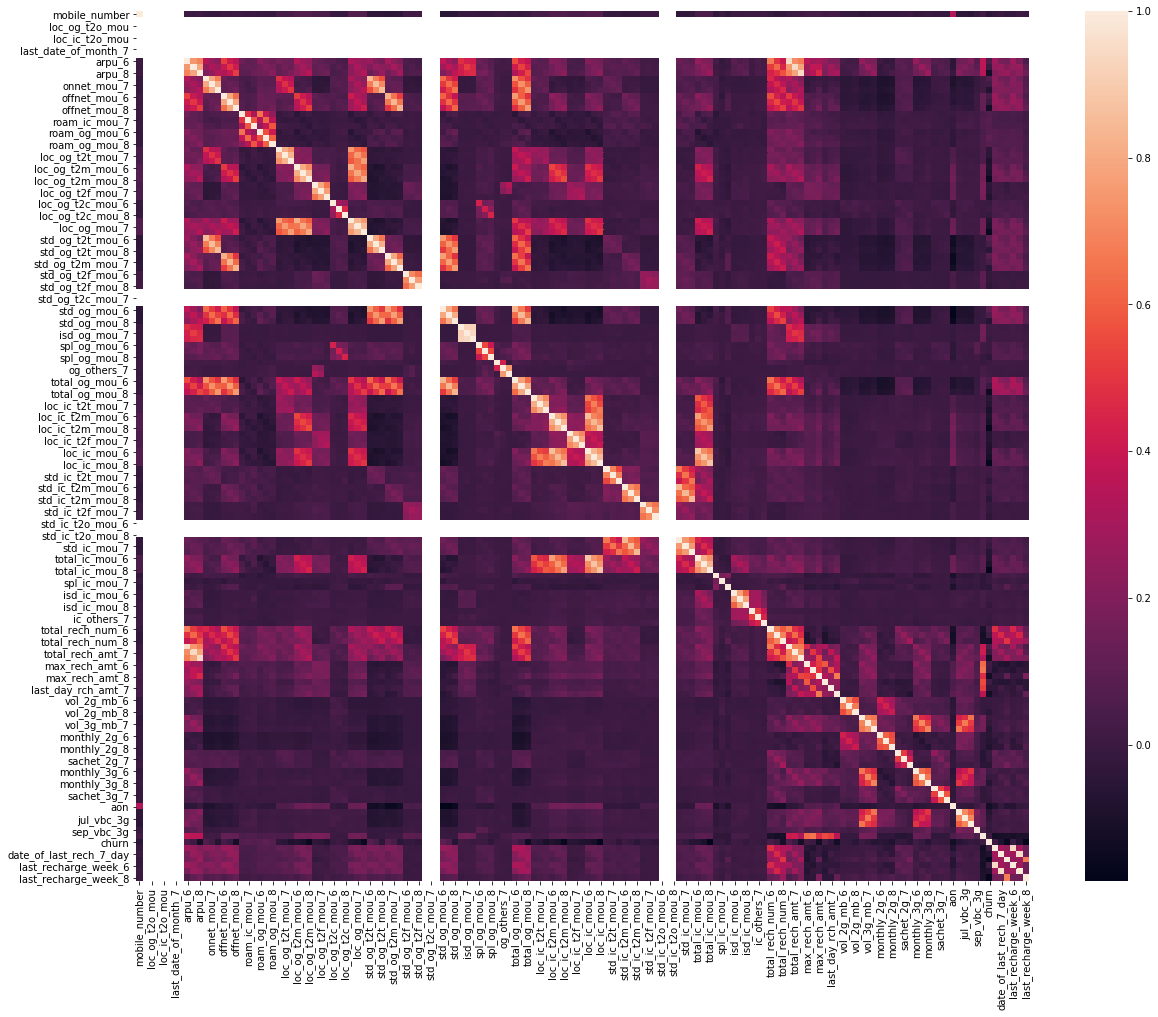

In [31]:
corr = df.corr()
plt.figure(figsize=(20,16))
sns.heatmap(corr)
plt.show()

Heatmap is difficult to comprehend due to large number of features, Let's see correlations Highest and lowest

In [32]:
min_max_corr = corr.unstack().sort_values()[::2]
min_max_corr[(min_max_corr>-1) & (min_max_corr<1)]

aon                      std_og_mou_7              -0.185411
std_og_mou_6             aon                       -0.181653
total_ic_mou_8           churn                     -0.176983
churn                    loc_ic_mou_8              -0.175946
last_recharge_week_8     churn                     -0.175236
churn                    loc_ic_t2m_mou_8          -0.163031
date_of_last_rech_8_day  churn                     -0.161336
std_og_mou_8             aon                       -0.155472
loc_og_mou_8             churn                     -0.155076
loc_og_t2m_mou_8         churn                     -0.153160
std_og_t2m_mou_7         aon                       -0.151152
aon                      std_og_t2m_mou_6          -0.149323
churn                    total_og_mou_8            -0.138336
aon                      std_og_t2t_mou_7          -0.132050
                         std_og_t2m_mou_8          -0.129665
churn                    max_rech_amt_8            -0.128060
                        

As we can see 'churn' and 'last_recharge_week_9' are highly negatively correlated with value approx -0.33<br>
And 'date_of_last_rech_7_day' and 'last_recharge_week_7' are highly positevly correlated with value approx 0.96

In [33]:
df['churn'].value_counts()

0    27008
1     2036
Name: churn, dtype: int64

### Handling Class Imbalance

We can handle class imbalance either with Oversampling or with UnderSampling. Let's Initiall try this using Under Sampling<br>
We will be using undersampling as of now because of lack of computational resources

In [34]:
###Over sampling
'''
count_class_0, count_class_1 = df['churn'].value_counts()
dfa = df[df.churn==0]
dfb = df[df.churn==1]
df_class_0_under = dfb.sample(count_class_0,replace =True)
df_test_under = pd.concat([df_class_0_under, dfa], axis=0)
df =df_test_under
'''

"\ncount_class_0, count_class_1 = df['churn'].value_counts()\ndfa = df[df.churn==0]\ndfb = df[df.churn==1]\ndf_class_0_under = dfb.sample(count_class_0,replace =True)\ndf_test_under = pd.concat([df_class_0_under, dfa], axis=0)\ndf =df_test_under\n"

In [35]:
### Under sampling
count_class_0, count_class_1 = df['churn'].value_counts()
dfa = df[df['churn']==0]
dfb = df[df['churn']==1]
df_class_0_under = dfa.sample(count_class_1)
df_test_under = pd.concat([df_class_0_under, dfb], axis=0)
df =df_test_under

### Train_Test_split

Since our churn values are very less, therfore we will use stratify. It will be used so as to equally distribute churn variable in Train and test dataset  

In [36]:
# We specify this so that the train and test data set always have the same rows, respectively
np.random.seed(0)
df_train, df_test = train_test_split(df, train_size = 0.7, test_size = 0.3, random_state = 100, stratify= df['churn'] )

In [37]:
df_train['churn'].value_counts()

1    1425
0    1425
Name: churn, dtype: int64

In [38]:
df_test['churn'].value_counts()

1    611
0    611
Name: churn, dtype: int64

So we have equally distributed the values

### Scalling Variables

Since we will be using PCA , therefore we will be scalling variables to get good components for churn prediction 

In [39]:
col_list = list(df_train.columns)
col_list.remove('churn')
col_list.remove('mobile_number')


Now, Transforming all the variables of df_train

In [40]:
scaler = MinMaxScaler()
df_train[col_list] = scaler.fit_transform(df_train[col_list])

In [41]:
df_train.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_recharge,churn,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,last_recharge_week_6,last_recharge_week_7,last_recharge_week_8
87172,7002162914,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.026177,0.031882,0.046812,0.000854,0.000249,0.002004,0.003248,0.002257,0.009536,0.0,0.000000,0.000000,0.0,0.000000,0.000000,0.001717,0.000554,0.003610,0.010671,0.003670,0.008774,0.000293,0.003678,0.014927,0.0,0.0,0.0,0.008179,0.004086,0.010373,0.00000,0.000000,0.0,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.00000,0.000000,0.000000,0.0,0.0,0.0,0.000000,0.002127,0.003380,0.003400,0.0,0.0,0.003922,0.002086,0.006243,0.165614,0.129788,0.133432,0.037549,0.017466,0.015677,0.078498,0.013973,0.028721,0.161688,0.129663,0.154054,0.000000,0.000000,0.0,0.000000,0.02379,0.009641,0.0,0.0,0.0,0.0,0.0,0.0,0.000000,0.023475,0.006558,0.161462,0.143294,0.159610,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.074074,0.057692,0.128205,0.017250,0.017899,0.038050,0.043271,0.051824,0.049677,0.052506,0.051824,0.013548,0.240092,0.101587,0.093200,0.010720,0.036060,0.026322,0.25,0.0,0.333333,0.0,0.153846,0.000000,0.0,0.0,0.0,0.0,0.2,0.0,0.118365,0.137017,0.173485,0.032824,0.0,0.002652,0,0.655172,0.866667,0.935484,0.6,0.75,1.000000
59618,7000086072,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.045096,0.031096,0.013127,0.015488,0.008371,0.001518,0.074869,0.055223,0.001543,0.0,0.000752,0.001169,0.0,0.002767,0.002612,0.000800,0.000194,0.000000,0.020851,0.003807,0.000000,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.013573,0.002748,0.000000,0.01514,0.007419,0.0,0.068869,0.053603,0.00000,0.0,0.0,0.0,0.0,0.0,0.0,0.08045,0.048763,0.000000,0.0,0.0,0.0,0.002282,0.004346,0.000000,0.083944,0.0,0.0,0.086930,0.049554,0.000000,0.011616,0.000000,0.000000,0.027886,0.002500,0.000000,0.000000,0.000000,0.000000,0.026806,0.001884,0.000000,0.007899,0.001046,0.0,0.009166,0.00002,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.013207,0.001051,0.000000,0.035920,0.002497,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.11111

In [42]:
df_train.shape

(2850, 147)

let's also transform the Test dataset

In [43]:
df_test[col_list] = scaler.transform(df_test[col_list])

In [44]:
df_test.head()

,mobile_number,circle_id,loc_og_t2o_mou,std_og_t2o_mou,loc_ic_t2o_mou,last_date_of_month_6,last_date_of_month_7,last_date_of_month_8,arpu_6,arpu_7,arpu_8,onnet_mou_6,onnet_mou_7,onnet_mou_8,offnet_mou_6,offnet_mou_7,offnet_mou_8,roam_ic_mou_6,roam_ic_mou_7,roam_ic_mou_8,roam_og_mou_6,roam_og_mou_7,roam_og_mou_8,loc_og_t2t_mou_6,loc_og_t2t_mou_7,loc_og_t2t_mou_8,loc_og_t2m_mou_6,loc_og_t2m_mou_7,loc_og_t2m_mou_8,loc_og_t2f_mou_6,loc_og_t2f_mou_7,loc_og_t2f_mou_8,loc_og_t2c_mou_6,loc_og_t2c_mou_7,loc_og_t2c_mou_8,loc_og_mou_6,loc_og_mou_7,loc_og_mou_8,std_og_t2t_mou_6,std_og_t2t_mou_7,std_og_t2t_mou_8,std_og_t2m_mou_6,std_og_t2m_mou_7,std_og_t2m_mou_8,std_og_t2f_mou_6,std_og_t2f_mou_7,std_og_t2f_mou_8,std_og_t2c_mou_6,std_og_t2c_mou_7,std_og_t2c_mou_8,std_og_mou_6,std_og_mou_7,std_og_mou_8,isd_og_mou_6,isd_og_mou_7,isd_og_mou_8,spl_og_mou_6,spl_og_mou_7,spl_og_mou_8,og_others_6,og_others_7,og_others_8,total_og_mou_6,total_og_mou_7,total_og_mou_8,loc_ic_t2t_mou_6,loc_ic_t2t_mou_7,loc_ic_t2t_mou_8,loc_ic_t2m_mou_6,loc_ic_t2m_mou_7,loc_ic_t2m_mou_8,loc_ic_t2f_mou_6,loc_ic_t2f_mou_7,loc_ic_t2f_mou_8,loc_ic_mou_6,loc_ic_mou_7,loc_ic_mou_8,std_ic_t2t_mou_6,std_ic_t2t_mou_7,std_ic_t2t_mou_8,std_ic_t2m_mou_6,std_ic_t2m_mou_7,std_ic_t2m_mou_8,std_ic_t2f_mou_6,std_ic_t2f_mou_7,std_ic_t2f_mou_8,std_ic_t2o_mou_6,std_ic_t2o_mou_7,std_ic_t2o_mou_8,std_ic_mou_6,std_ic_mou_7,std_ic_mou_8,total_ic_mou_6,total_ic_mou_7,total_ic_mou_8,spl_ic_mou_6,spl_ic_mou_7,spl_ic_mou_8,isd_ic_mou_6,isd_ic_mou_7,isd_ic_mou_8,ic_others_6,ic_others_7,ic_others_8,total_rech_num_6,total_rech_num_7,total_rech_num_8,total_rech_amt_6,total_rech_amt_7,total_rech_amt_8,max_rech_amt_6,max_rech_amt_7,max_rech_amt_8,last_day_rch_amt_6,last_day_rch_amt_7,last_day_rch_amt_8,vol_2g_mb_6,vol_2g_mb_7,vol_2g_mb_8,vol_3g_mb_6,vol_3g_mb_7,vol_3g_mb_8,monthly_2g_6,monthly_2g_7,monthly_2g_8,sachet_2g_6,sachet_2g_7,sachet_2g_8,monthly_3g_6,monthly_3g_7,monthly_3g_8,sachet_3g_6,sachet_3g_7,sachet_3g_8,aon,aug_vbc_3g,jul_vbc_3g,jun_vbc_3g,sep_vbc_3g,good_phase_avg_recharge,churn,date_of_last_rech_6_day,date_of_last_rech_7_day,date_of_last_rech_8_day,last_recharge_week_6,last_recharge_week_7,last_recharge_week_8
61223,7000420157,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.030557,0.027475,0.058638,0.003007,0.000000,0.001492,0.005781,0.004683,0.016068,0.0,0.0,0.00000,0.0,0.0,0.000000,0.006044,0.000000,0.002689,0.015546,0.010621,0.019239,0.005464,0.000844,0.004729,0.000000,0.000000,0.0,0.016782,0.007424,0.013946,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.004539,0.000000,0.006131,0.0,0.0,0.0,0.000164,0.000000,0.000245,0.0,0.0,0.000000,0.000000,0.000000,0.00000,0.0,0.0,0.0,0.008179,0.003583,0.008293,0.014132,0.002710,0.011615,0.026127,0.022693,0.019174,0.060411,0.216709,0.372511,0.037491,0.076642,0.129560,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.001049,0.000000,0.015089,0.0,0.0,0.0,0.000195,0.000000,0.002549,0.037577,0.076636,0.131721,0.0,0.0,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.037037,0.057692,0.153846,0.015333,0.014366,0.050122,0.043271,0.052506,0.063871,0.010228,0.010228,0.000000,0.010396,0.002828,0.008734,0.075986,0.056680,0.057556,0.25,0.2,0.333333,0.0,0.0,0.0,0.0,0.000000,0.000000,0.0,0.0,0.0,0.044854,0.205309,0.154078,0.104758,0.04724,0.005152,0,0.482759,0.633333,0.774194,0.4,0.5,0.971429
64495,7001117515,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.077124,0.080232,0.158434,0.123858,0.121241,0.091653,0.016055,0.066526,0.102495,0.0,0.0,0.00000,0.0,0.0,0.000000,0.074329,0.073648,0.058717,0.037264,0.101402,0.096822,0.015818,0.016098,0.049159,0.068768,0.166729,0.0,0.092687,0.140724,0.115410,0.087172,0.088440,0.063123,0.000560,0.015420,0.011086,0.000000,0.000000,0.000000,0.0,0.0,0.0,0.072784,0.100103,0.063751,0.0,0.0,0.000000,0.024597,0.118246,0.05574,0.0,0.0,0.0,0.118119,0.172695,0.131890,0.072609,0.077704,0.056416,0.041572,0.025954,0.034642,0.088085,0.051254,0.063865,0.095987,0.100621,0.105556,0.000715,0.014646,0.047140,0.006557,0.006199,0.003574,0.011847,0.000000,0

In [45]:
df_test.shape

(1222, 147)

### Applying PCA

Since now our dataset is almost set. We need to apply PCA so as to reduce the number of features

In [46]:
y_train_labels= df_train.pop('mobile_number')
y_train = df_train.pop('churn')
X_train = df_train
pca = PCA(svd_solver='randomized', random_state=0)
pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=0,
    svd_solver='randomized', tol=0.0, whiten=False)

In [47]:
y_test_labels = df_test.pop('mobile_number')
y_test = df_test.pop('churn')
X_test = df_test

In [48]:
pca.components_

array([[ 9.98713168e-17,  0.00000000e+00,  3.46944695e-18, ...,
        -1.75259015e-01, -3.73434064e-01, -4.53912799e-01],
       [-3.02012000e-18,  9.71445147e-17, -3.33066907e-16, ...,
         3.10574901e-01,  2.59857996e-01, -4.83633011e-01],
       [-1.96927507e-18,  1.35308431e-16, -0.00000000e+00, ...,
        -2.23052698e-01,  6.89407514e-02, -5.16084463e-02],
       ...,
       [ 0.00000000e+00,  3.95498423e-01,  7.94847830e-02, ...,
        -9.71445147e-17,  1.11022302e-16,  1.66533454e-16],
       [ 0.00000000e+00,  2.04299999e-01,  2.57556492e-02, ...,
         5.55111512e-17,  1.66533454e-16, -1.24900090e-16],
       [ 1.00000000e+00, -6.02589535e-23,  9.24264432e-24, ...,
         1.11279259e-15,  1.45147069e-15,  3.06932210e-18]])

In [49]:
pcs_df = pd.DataFrame({'PC1':pca.components_[0],'PC2':pca.components_[1], 'Feature':X_train.columns})
pcs_df.head()

,PC1,PC2,Feature
0,9.987132e-17,-3.020120e-18,circle_id
1,0.000000e+00,9.714451e-17,loc_og_t2o_mou
2,3.469447e-18,-3.330669e-16,std_og_t2o_mou
3,0.000000e+00,2.220446e-16,loc_ic_t2o_mou
4,1.355253e-20,4.163336e-17,last_date_of_month_6


In [50]:
pcs_df

,PC1,PC2,Feature
0,9.987132e-17,-3.020120e-18,circle_id
1,0.000000e+00,9.714451e-17,loc_og_t2o_mou
2,3.469447e-18,-3.330669e-16,std_og_t2o_mou
3,0.000000e+00,2.220446e-16,loc_ic_t2o_mou
4,1.355253e-20,4.163336e-17,last_date_of_month_6
5,-1.694066e-21,3.469447e-18,last_date_of_month_7
6,-2.117582e-22,0.000000e+00,last_date_of_month_8
7,-1.836432e-02,5.149175e-02,arpu_6
8,-3.164939e-02,3.457528e-02,arpu_7
9,-9.042596e-02,3.574368e-02,arpu_8


The above table shows all the principal components. For better Reference we will take a look at first 2 principal components for the columns



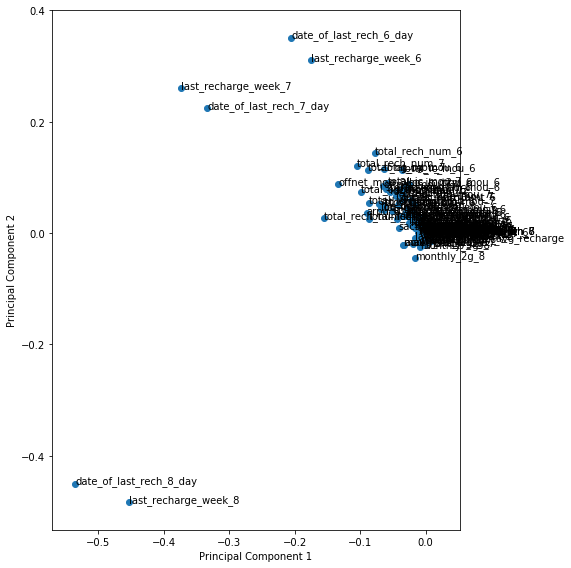

In [51]:
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.scatter(pcs_df.PC1, pcs_df.PC2)
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
for i, txt in enumerate(pcs_df.Feature):
    plt.annotate(txt, (pcs_df.PC1[i],pcs_df.PC2[i]))
plt.tight_layout()
plt.show()

As we can see columns (last_recharge_week), (date_of_last_recharge) and (aon) are having more influence for all the months

Looking at the screeplot to assess the number of needed principal components

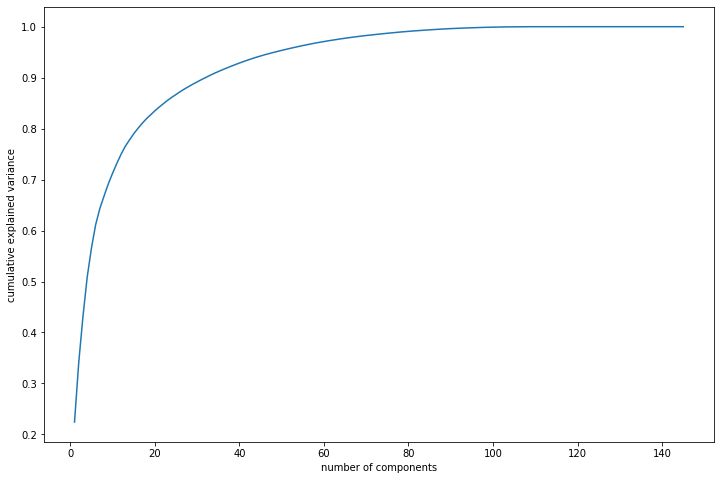

In [52]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (12,8))
plt.plot(range(1,len(df_train.columns)+1),np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

As we can see from the scree plot above , at around 50 variables we are able to explain 95 % variance of the data

Therefore we will take 50 components to create the model

In [53]:
#Using incremental PCA for efficiency - saves a lot of time on larger datasets

pca_final = IncrementalPCA(n_components=50)
X_train_pca = pca_final.fit_transform(X_train)
X_train_pca.shape

(2850, 50)

So lets see the correlation heatmap of the components

In [54]:
#creating correlation matrix for the principal components
corrmat = np.corrcoef(X_train_pca.transpose())
# 1s -> 0s in diagonals
corrmat_nodiag = corrmat - np.diagflat(corrmat.diagonal())
print("max corr:",corrmat_nodiag.max(), ", min corr: ", corrmat_nodiag.min(),)
# we see that correlations are indeed very close to 0

max corr: 0.009778433005503729 , min corr:  -0.017095694750276013


Applying PCA to test data as well

In [55]:
X_test_pca = pca_final.transform(X_test)
X_test_pca.shape

(1222, 50)

## PART : 3 Modeling

### Model -- 1 : Logistic Regression with L2 Regularization

### `Modelling Logistic Regression with default HyperParameters`

Assuming Presision and Recall are both important in this case so we are taking F1 SCore as a way to find better model

In [56]:
lrmodel = LogisticRegression(penalty='l2')
lrmodel.fit(X_train_pca,y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

Now Predicting Test data set

In [57]:
test_pred = lrmodel.predict(X_test_pca)

Now lets measure the performance of the model with respect to y_test

In [58]:
accuracy_score = metrics.accuracy_score(y_test, test_pred)
precision_score = metrics.precision_score(y_test, test_pred)
recall_score = metrics.recall_score(y_test, test_pred)
f1_score = metrics.f1_score(y_test, test_pred)

# print(accuracy_score, precision_score, recall_score, f1_score)


# write the scores into the output file as a dictionary
# this code is already written for you
d = {'recall_score': recall_score,
    'f1_score': f1_score,
    'accuracy_score': accuracy_score,
	'precision_score': precision_score}
for key,val in d.items():
    print(key,'  :  ',val)


recall_score   :   0.8477905073649754
f1_score   :   0.820919175911252
accuracy_score   :   0.8150572831423896
precision_score   :   0.7956989247311828


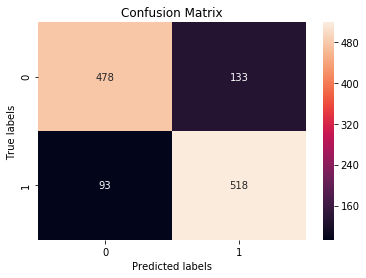

In [59]:
cm = metrics.confusion_matrix(y_test, test_pred)
ax= plt.subplot()
akws = {"ha": 'center',"va": 'center'}
sns.heatmap(cm, annot=True, ax = ax,fmt="d",annot_kws=akws); #annot=True to annotate cells
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 


### Tuning HuperParameters

In [60]:
# specify number of folds for k-fold CV
n_folds = 5


param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 1000] }
clf = GridSearchCV(LogisticRegression(penalty='l2'), param_grid,scoring="f1",cv=n_folds)



clf.fit(X_train_pca,y_train)
# scores of GridSearch CV
scores = clf.cv_results_
pd.DataFrame(scores).head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.007843,0.001107,0.002638,0.000384,0.001,{'C': 0.001},0.728302,0.736475,0.711111,0.768142,0.711572,0.731120,0.020927,7
1,0.008744,0.005090,0.000615,0.000753,0.01,{'C': 0.01},0.762774,0.746167,0.755319,0.795139,0.739353,0.759750,0.019399,6
2,0.015630,0.000003,0.000000,0.000000,0.1,{'C': 0.1},0.806394,0.793970,0.797909,0.807560,0.782462,0.797659,0.009154,5
3,0.025006,0.007654,0.000000,0.000000,1,{'C': 1},0.842657,0.819113,0.807692,0.838488,0.818636,0.825317,0.013175,4
4,0.028134,0.006256,0.000000,0.000000,10,{'C': 10},0.854671,0.839041,0.824561,0.864028,0.812604,0.838981,0.018853,1


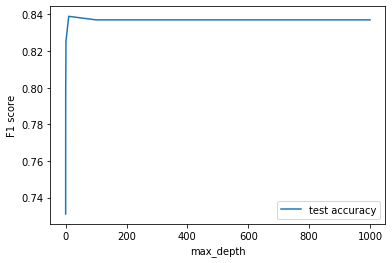

In [62]:
# plotting accuracies with max_depth
plt.figure()

plt.plot(scores["param_C"], 
         scores["mean_test_score"], 
         label="test accuracy")
plt.xlabel("max_depth")
plt.ylabel("F1 score")
plt.legend()
plt.show()

### Now let's see the performance of chosen Parameters

In [63]:
lr = LogisticRegression(penalty='l2',C=10)
lr.fit(X_train_pca,y_train)

LogisticRegression(C=10, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [64]:
pred = lr.predict(X_test_pca)
# F1 score
metrics.f1_score(y_test, pred)

0.8258785942492013

### Since the above model is created using PCA , we will not see important features

### Model -- 2 : Decision tree classifier with AdaBoost

In [70]:
# adaboost classifier with max 600 decision trees of depth=2
# learning_rate/shrinkage=1.5

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
adaboost_model_1 = AdaBoostClassifier(
    base_estimator=tree,
    n_estimators=600,
    learning_rate=1.5,
    algorithm="SAMME")

In [71]:
# fit
adaboost_model_1.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [93]:
# predictions
# the second column represents the probability of a click resulting in a download
predictions = adaboost_model_1.predict(X_test)
#predictions

In [94]:
# metrics: AUC
metrics.f1_score(y_test, predictions)

0.8653061224489795

### AdaBoost - Hyperparameter Tuning

Let's now tune the hyperparameters of the AdaBoost classifier. In this case, we have two types of hyperparameters - those of the component trees (max_depth etc.) and those of the ensemble (n_estimators, learning_rate etc.). 


We can tune both using the following technique - the keys of the form ```base_estimator_parameter_name``` belong to the trees (base estimator), and the rest belong to the ensemble.

In [74]:
# parameter grid
param_grid = {"base_estimator__max_depth" : [2, 5],
              "n_estimators": [200, 400, 600]
             }
# base estimator
tree = DecisionTreeClassifier()

# adaboost with the tree as base estimator
# learning rate is arbitrarily set to 0.6, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    algorithm="SAMME")
# run grid search
folds = 3
grid_search_ABC = GridSearchCV(ABC, 
                               cv = folds,
                               param_grid=param_grid, 
                               scoring = 'f1', 
                               return_train_score=True,                         
                               verbose = 1)
# fit 
grid_search_ABC.fit(X_train, y_train)

Fitting 3 folds for each of 6 candidates, totalling 18 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  18 out of  18 | elapsed:  5.3min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=AdaBoostClassifier(algorithm='SAMME',
                                          base_estimator=DecisionTreeClassifier(class_weight=None,
                                                                                criterion='gini',
                                                                                max_depth=None,
                                                                                max_features=None,
                                                                                max_leaf_nodes=None,
                                                                                min_impurity_decrease=0.0,
                                                                                min_impurity_split=None,
                                                                                min_samples_leaf=1,
                                                                                mi

In [75]:
# cv results
cv_results = pd.DataFrame(grid_search_ABC.cv_results_)
cv_results

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_base_estimator__max_depth,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,mean_train_score,std_train_score
0,5.161426,0.014635,0.062520,0.000002,2,200,"{'base_estimator__max_depth': 2, 'n_estimators...",0.860541,0.847896,0.851931,0.853456,0.005273,5,0.919577,0.917509,0.927552,0.921546,0.004330
1,10.577492,0.211003,0.147899,0.017433,2,400,"{'base_estimator__max_depth': 2, 'n_estimators...",0.848875,0.853162,0.847568,0.849868,0.002389,6,0.946541,0.939057,0.950630,0.945409,0.004792
2,15.671883,0.093615,0.192765,0.007364,2,600,"{'base_estimator__max_depth': 2, 'n_estimators...",0.854390,0.860814,0.845739,0.853647,0.006177,4,0.964792,0.963627,0.971189,0.966536,0.003324
3,11.722222,0.110533,0.068407,0.007352,5,200,"{'base_estimator__max_depth': 5, 'n_estimators...",0.867314,0.863043,0.858065,0.862807,0.003780,3,1.000000,1.000000,1.000000,1.000000,0.000000
4,23.423484,0.078559,0.140770,0.000126,5,400,"{'base_estimator__max_depth': 5, 'n_estimators...",0.875536,0.868167,0.855905,0.866536,0.008097,1,1.000000,1.000000,1.000000,1.000000,0.000000
5,35.629565,0.117551,0.203319,0.000182,5,600,"{'base_estimator__max_depth': 5, 'n_estimators...",0.869752,0.864807,0.864572,0.866377,0.002389,2,1.000000,1.000000,1.000000,1.000000,0.000000


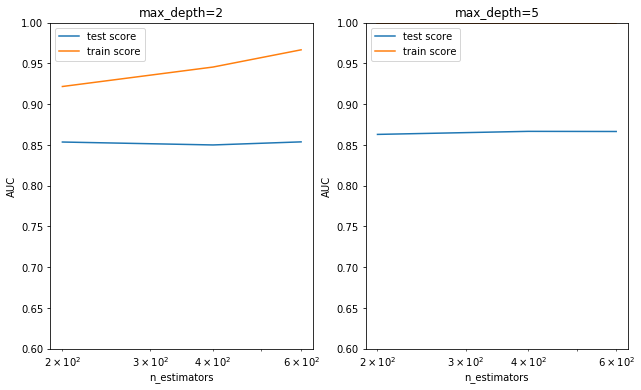

In [76]:
# plotting AUC with hyperparameter combinations

plt.figure(figsize=(16,6))
for n, depth in enumerate(param_grid['base_estimator__max_depth']):
    

    # subplot 1/n
    plt.subplot(1,3, n+1)
    depth_df = cv_results[cv_results['param_base_estimator__max_depth']==depth]

    plt.plot(depth_df["param_n_estimators"], depth_df["mean_test_score"])
    plt.plot(depth_df["param_n_estimators"], depth_df["mean_train_score"])
    plt.xlabel('n_estimators')
    plt.ylabel('AUC')
    plt.title("max_depth={0}".format(depth))
    plt.ylim([0.60, 1])
    plt.legend(['test score', 'train score'], loc='upper left')
    plt.xscale('log')

    


The results above show that:
- The ensemble with max_depth=5 is clearly overfitting (training auc is almost 1, while the test score is much lower)
- At max_depth=2, the model performs slightly better (approx 95% AUC) with a higher test score 

Thus, we should go ahead with ```max_depth=2``` and ```n_estimators=200```.

Note that we haven't experimented with many other important hyperparameters till now, such as ```learning rate```, ```subsample``` etc., and the results might be considerably improved by tuning them. We'll next experiment with these hyperparameters.

### Now let's see the performance of chosen Parameters

In [77]:
# model performance on test data with chosen hyperparameters

# base estimator
tree = DecisionTreeClassifier(max_depth=2)

# adaboost with the tree as base estimator
# learning rate is arbitrarily set, we'll discuss learning_rate below
ABC = AdaBoostClassifier(
    base_estimator=tree,
    learning_rate=0.6,
    n_estimators=200,
    algorithm="SAMME")

ABC.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME',
                   base_estimator=DecisionTreeClassifier(class_weight=None,
                                                         criterion='gini',
                                                         max_depth=2,
                                                         max_features=None,
                                                         max_leaf_nodes=None,
                                                         min_impurity_decrease=0.0,
                                                         min_impurity_split=None,
                                                         min_samples_leaf=1,
                                                         min_samples_split=2,
                                                         min_weight_fraction_leaf=0.0,
                                                         presort=False,
                                                         random_state=None,
                               

In [91]:
# predict on test data
predictions = ABC.predict(X_test)
#predictions[:10]

In [92]:
# roc auc
metrics.f1_score(y_test, predictions)

0.8613617719442166

In [95]:
# feature importance
importance = dict(zip(X_train.columns, ABC.feature_importances_))
importance
sorted_d = sorted(importance.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('loc_ic_mou_8', 0.08578765081437786),
 ('total_ic_mou_8', 0.07070564048590816),
 ('sep_vbc_3g', 0.05548245041634586),
 ('loc_ic_t2m_mou_6', 0.05044301950104131),
 ('date_of_last_rech_8_day', 0.04212953897939188),
 ('arpu_6', 0.041738061035637854),
 ('loc_og_t2m_mou_8', 0.033659765271960615),
 ('last_day_rch_amt_8', 0.03292599171790688),
 ('roam_og_mou_8', 0.02744132726093514),
 ('good_phase_avg_recharge', 0.026589635446568997),
 ('loc_ic_mou_7', 0.026286009431702104),
 ('spl_ic_mou_8', 0.025041502314934686),
 ('loc_ic_t2f_mou_8', 0.020576629674205194),
 ('vol_2g_mb_8', 0.01959736486734871),
 ('vol_3g_mb_8', 0.01885504556119487),
 ('total_rech_amt_8', 0.017510664109815065),
 ('loc_og_mou_6', 0.017417474145967324),
 ('arpu_7', 0.015744719455332432),
 ('vol_2g_mb_6', 0.015220863749133192),
 ('loc_og_mou_8', 0.014148872291813892),
 ('loc_ic_t2m_mou_7', 0.013759177894500927),
 ('isd_ic_mou_7', 0.013131996030037023),
 ('total_og_mou_6', 0.012190244310050164),
 ('arpu_8', 0.0119187153537156

### Model -- 3 : Random Forest classifier

### `Modelling random forest with default HyperParameters`

Assuming Presision and Recall are both important in this case so we are taking F1 SCore as a way to find better model

In [81]:
# Running the random forest with default parameters.
rfc = RandomForestClassifier()
# fit
rfc.fit(X_train,y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=None, max_features='auto', max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=10,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [82]:
# Making predictions
predictions = rfc.predict(X_test)
# Let's check the report of our default model
metrics.f1_score(y_test, predictions)
#print(classification_report(y_test,predictions))

0.8228176318063959

In [83]:
confusion_matrix(y_test,predictions)

array([[541,  70],
       [135, 476]], dtype=int64)

In [84]:
dict1 = {}
for feature,importance in zip(X_train.columns, rfc.feature_importances_):
    dict1[feature] = importance

sorted_d = sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('total_ic_mou_8', 0.12821320591507396),
 ('loc_og_mou_8', 0.07499206376181702),
 ('loc_og_t2t_mou_8', 0.06772169736209108),
 ('total_og_mou_8', 0.040515519252781795),
 ('max_rech_amt_8', 0.037522932534937256),
 ('loc_ic_t2m_mou_8', 0.027540879543276914),
 ('loc_og_t2f_mou_8', 0.025367059978536298),
 ('loc_ic_mou_8', 0.024197897607319295),
 ('last_day_rch_amt_8', 0.021621702926895397),
 ('loc_ic_t2m_mou_7', 0.020014364341999016),
 ('arpu_8', 0.01921303030840906),
 ('roam_ic_mou_8', 0.01881289779519927),
 ('roam_og_mou_8', 0.018280505959325948),
 ('std_og_t2m_mou_8', 0.017724654639473307),
 ('std_og_mou_7', 0.013025289819608299),
 ('total_rech_amt_8', 0.012403980580287364),
 ('date_of_last_rech_8_day', 0.011238743365713857),
 ('arpu_7', 0.009983218052211517),
 ('loc_og_t2m_mou_8', 0.009508510285475473),
 ('onnet_mou_7', 0.009339192566793808),
 ('total_rech_amt_7', 0.008901630089811808),
 ('loc_ic_t2f_mou_8', 0.008615222960200175),
 ('total_rech_amt_6', 0.008346364063908682),
 ('arpu_6'

### Tuning HuperParameters

## Grid Search to Find Optimal Hyperparameters

We can now find the optimal hyperparameters using GridSearchCV.

In [85]:
# Create the parameter grid based on the results of random search 
param_grid = {
    'max_depth': [6,7,8],
    'min_samples_leaf': [20,30,40],
    'min_samples_split': [20,40,60],
    'n_estimators': [70,80,90], 
    'max_features': [20,30,40]
}
# Create a based model
rf = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1,verbose = 1)
# Fit the grid search to the data
grid_search.fit(X_train, y_train)



Fitting 3 folds for each of 243 candidates, totalling 729 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  34 tasks      | elapsed:    7.4s
[Parallel(n_jobs=-1)]: Done 184 tasks      | elapsed:   32.6s
[Parallel(n_jobs=-1)]: Done 434 tasks      | elapsed:  1.3min
[Parallel(n_jobs=-1)]: Done 729 out of 729 | elapsed:  2.2min finished


GridSearchCV(cv=3, error_score='raise-deprecating',
             estimator=RandomForestClassifier(bootstrap=True, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators='warn', n_jobs=None,
                                              oob_score=False,
                                              random_state=None, verbose=0,
                                              warm_start=False),
             iid

In [86]:
# printing the optimal accuracy score and hyperparameters
print('We can get accuracy of',grid_search.best_score_,'using',grid_search.best_params_)

We can get accuracy of 0.8536842105263158 using {'max_depth': 7, 'max_features': 40, 'min_samples_leaf': 20, 'min_samples_split': 20, 'n_estimators': 90}


### Now let's see the performance of chosen Parameters

In [87]:
rf = RandomForestClassifier(max_depth=7,min_samples_leaf=30,min_samples_split=40,n_estimators=80,max_features=40)

In [88]:
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
                       max_depth=7, max_features=40, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=30, min_samples_split=40,
                       min_weight_fraction_leaf=0.0, n_estimators=80,
                       n_jobs=None, oob_score=False, random_state=None,
                       verbose=0, warm_start=False)

In [89]:
# Making predictions
predictions = rf.predict(X_test)
# Let's check the report of our default model
metrics.f1_score(y_test, predictions)

0.8261238337574215

In [90]:
dict1 = {}
for feature,importance in zip(X_train.columns, rf.feature_importances_):
    dict1[feature] = importance

sorted_d = sorted(dict1.items(), key=operator.itemgetter(1),reverse=True)
sorted_d

[('loc_ic_mou_8', 0.2667338412255459),
 ('total_ic_mou_8', 0.10518512823779277),
 ('loc_ic_t2t_mou_8', 0.09370812035856937),
 ('loc_ic_t2m_mou_8', 0.0907578330675466),
 ('total_og_mou_8', 0.0618515479998871),
 ('last_day_rch_amt_8', 0.0451761477604561),
 ('roam_og_mou_8', 0.041320788039437534),
 ('loc_og_mou_8', 0.03589092280120461),
 ('loc_og_t2m_mou_8', 0.030247778722439656),
 ('roam_ic_mou_8', 0.027439744106432167),
 ('total_rech_amt_8', 0.02733844644522481),
 ('loc_og_t2t_mou_8', 0.011859936628584672),
 ('date_of_last_rech_8_day', 0.011656964268365546),
 ('arpu_8', 0.007936062048980397),
 ('max_rech_amt_8', 0.007569660658975382),
 ('arpu_7', 0.007546180936653861),
 ('vol_2g_mb_8', 0.005906708714374939),
 ('total_ic_mou_7', 0.005658907400253399),
 ('std_og_mou_7', 0.005356475904414538),
 ('vol_3g_mb_8', 0.005356282957840244),
 ('offnet_mou_7', 0.005123543495240367),
 ('total_rech_amt_7', 0.004952491466594489),
 ('total_og_mou_7', 0.003541471116522414),
 ('total_og_mou_6', 0.00349848

## PART : 4 Model Evaluation

### logistic regression with l2 
default parameters is 82.1%<br>
with hyperparameter tuning is 82.6%

### Decision Tree Classifier with Adaboost 
default parameters is 86.5%<br>
with hyperparameter tuning is 86.1%

### Random Forest classifier 
default parameters is 82.3%<br>
with hyperparameter tuning is 82.6%


## 5 of the most Important Features  in our second model are

('`loc_ic_mou_8`', `0.08578765081437786`),<br>
 ('`total_ic_mou_8`', `0.07070564048590816`),<br>
 ('`sep_vbc_3g`', `0.05548245041634586`),<br>
 ('`loc_ic_t2m_mou_6`', `0.05044301950104131`),<br>
 ('`date_of_last_rech_8_day`', `0.04212953897939188`),<br>